# Histograms

It is possible to plot the distribution of colours with OpenCV.

## Grayscale

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("samples/tree.png")

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show(*images):
    for i in images:
        image = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.show()

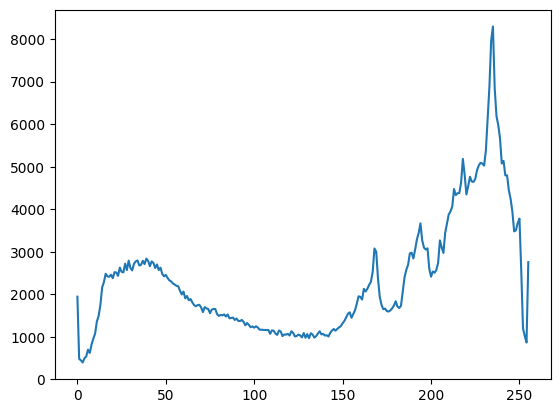

In [3]:
#Plotting the distribution of colours for grayscale images
import matplotlib.pyplot as plt

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([gray], [0], None, [256], [0, 256]) #this takes as paramaters the list of channels and an optional mask which is the region where the histogram is calculated
plt.plot(hist)
plt.show()

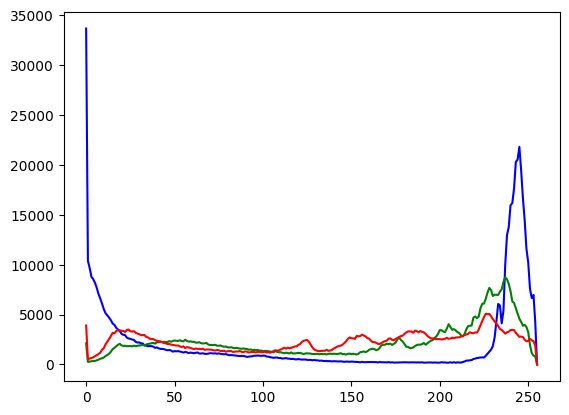

In [4]:
#Plotting the distribution of colours
color = ("b", "g", "r") #cv2 automatically maps colours to this strings

for i, col in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 255])
    plt.plot(hist, color = col)

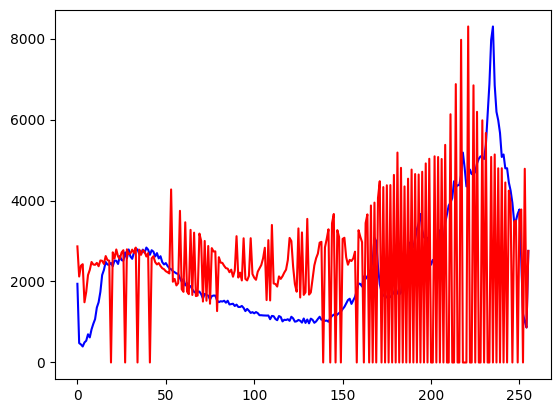

In [6]:
img = cv2.imread("samples/tree.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_eq = cv2.equalizeHist(gray)

#Compare histograms of the original and the gray-equalized version of an image

hist_gray = cv2.calcHist([gray], [0], None, [256], [0, 256])
hist_gray_eq = cv2.calcHist([gray_eq], [0], None, [256], [0, 256])

plt.plot(hist_gray, color = 'b')
plt.plot(hist_gray_eq, color = 'r')

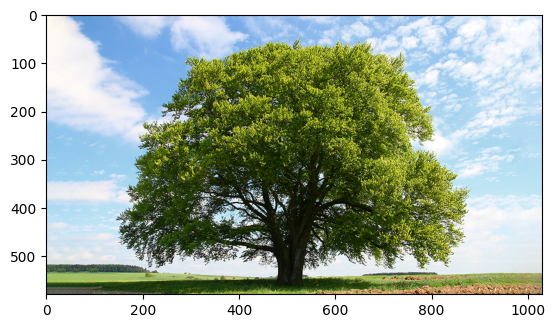

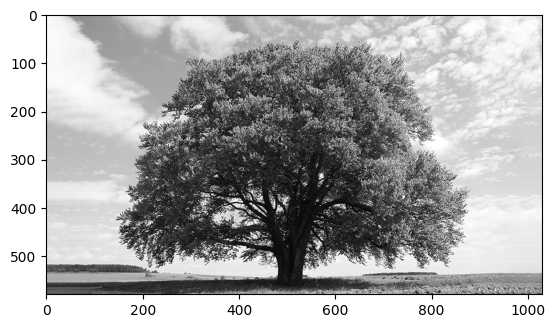

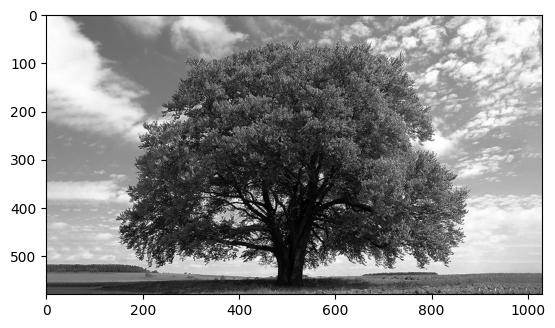

In [7]:
show(img)
show(gray)
show(gray_eq)

## Coloured image

Equalization is applied on each channel separately, and then they are reconstructed together.

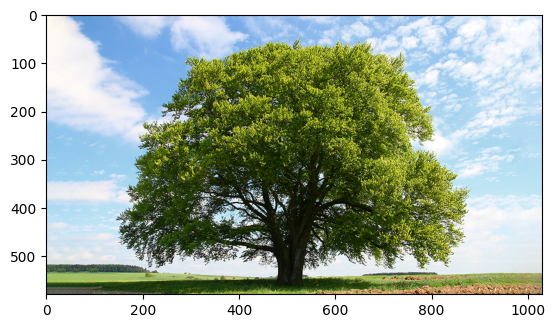

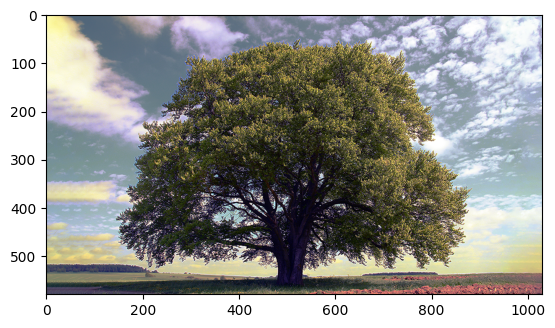

In [8]:
img = cv2.imread("samples/tree.png")
channels = cv2.split(img)
eq_channels = []

for chann in channels:
    eq_channels.append(cv2.equalizeHist(chann))

equalized = cv2.merge(eq_channels)
show(img)
show(equalized)

This is a very violent way to enhance contrast. It is possible to do it in more subtle ways.

## Changing the colourspace to enhance contrast

**HSV** is a different colurspace measuring Hue (position in the spectrum), Saturation (distance from white) and Value (brightness).

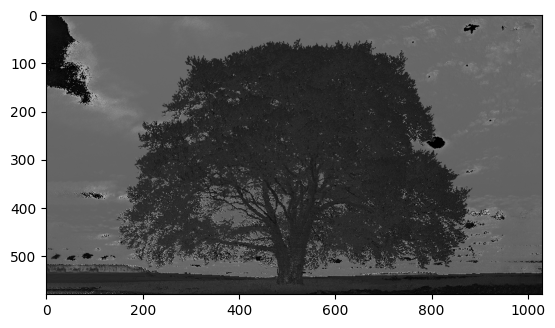

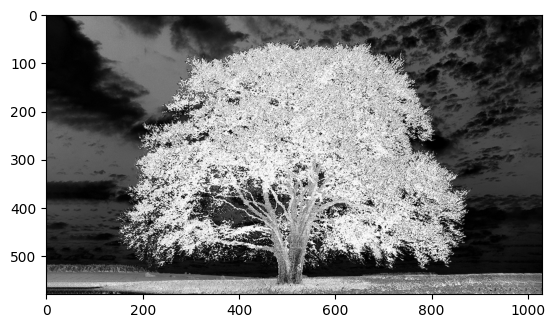

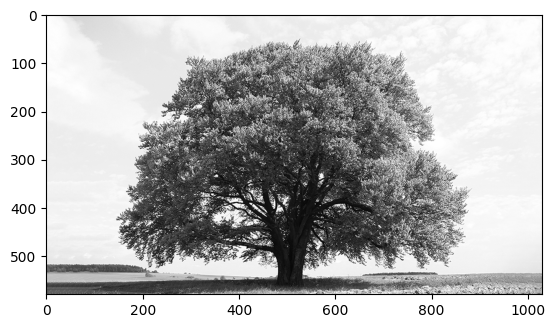

In [13]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_img)
show(h)
show(s)
show(v)

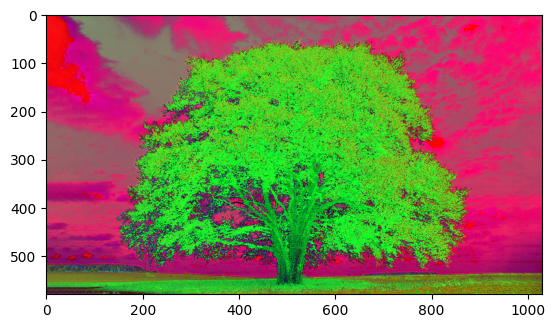

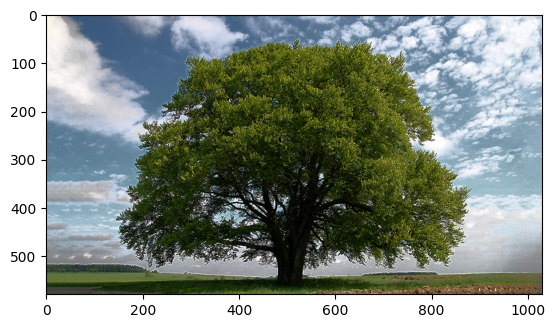

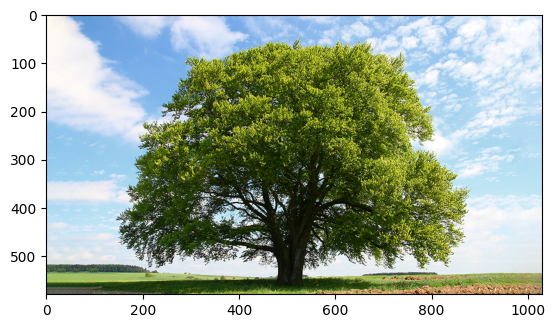

In [16]:
eq_v = cv2.equalizeHist(v)

equalized = cv2.merge([h, s, eq_v])
show(equalized) #not this
equalized = cv2.cvtColor(equalized, cv2.COLOR_HSV2BGR)
show(equalized)
show(img)

# CLAHE

It applies contrast correction only in a portion of the image. It is only for greyscale images.

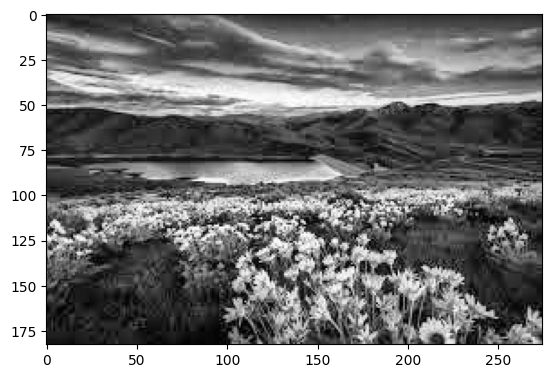

In [20]:
img = cv2.imread("samples/landscape.jpeg", 0)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))  #this is an upper bound on which the hist is computed

eq_img = clahe.apply(img)
show(eq_img)